In [1]:
%matplotlib inline

# SYDE 522 Assignment 3
## Backpropagation and Multilayer Perceptrons

### Due: Monday Nov 6 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [1 mark]** The following code generates the nested circles dataset that we have used in class before.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
```

As before, you can split this into training and test data
```python
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)
```

To classify this data using a multi-layer perceptron trained using backprop, we can use the built-in implementation in `sklearn`.

```python
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization
```

To train the model, use
```python
mlp.fit(x_train, y_train)
```

To determine the outputs on your testing data `x_test`, use
```python
output = mlp.predict(x_test)
```

Train your the network using 80% of the data as training data and test it on the other 20%.  Compute the Root Mean Squared Error and report it.

In [73]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("The RMSE is:",rmse)


The RMSE is: 0.14331007729335596


**b) [1 mark]** For the model you trained in part a), plot the output for a grid of inputs between -2 and 2.  This can be done using similar code as used in the last assignment:
```python
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
```

Has the network learned to classify the data well?

The RMSE is: 0.14331007729335596


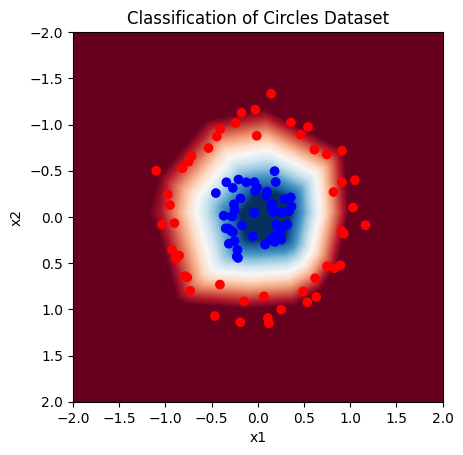

In [5]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("The RMSE is:",rmse)

extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Circles Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))




From the shown colour plot, the MLP shows clear distinction between the two groups classified. The contour of black shows the separation of blue and red points. From this, it can safely be said that the network did a great job at learning how to classify the data. The RMSE of the model is still fairly low, indicating good classification of the data points.

**c) [1 mark]** Repeat part a) but reduce the network size so that there are only 10 features (i.e. 10 neurons in the hidden layer).  Report the RMSE and generate the same plot as in part b).  Has the network learned to classify the data well?

The RMSE is: 0.117532249926477


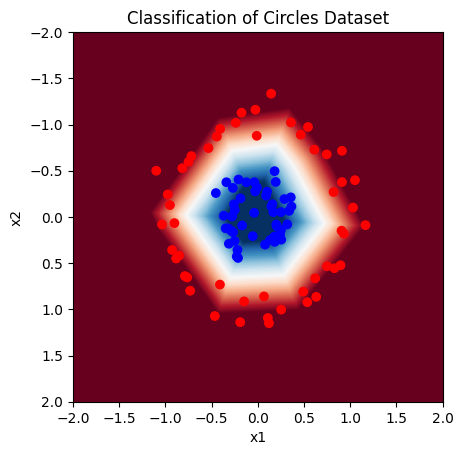

In [6]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,), # one hidden layer with 10 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("The RMSE is:",rmse)

extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Circles Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))


From the shown colour plot, the MLP shows clear distinction between the two groups classified. The contour of black shows the separation of blue and red points. Comparing the results to question 1b, there is a lower RMSE value, indicating less error produced by the MLP's classification. Comparing the colour plots, the plot in question 1c, the bounded region for blue points seem to be more strictly confined, while question 1b's plot was less tightly bounded.

**d) [1 mark]** Repeat part a) but for the following different number of features: `[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`.  For each number of features, repeat the process 10 times and compute the average RMSE over those 10 times.  Note that you will have to change the `random_state=0` parameter each time, in both the `MLPRegressor` and the `train_test_split` code.  For example, if you do this in a for loop `for i in range(10):` then you would set `random_state=i`.  

Generate a plot showing how the average RMSE changes as you adjust the number of features.

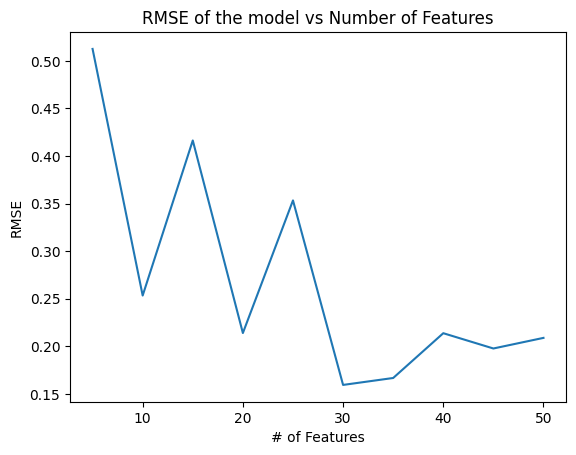

In [1]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt

features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
rmseovr = np.zeros(10)

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
for i in range(len(features)):
    rmsetemp = np.zeros(10)
    for j in range(10):
        import sklearn.model_selection
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
            x, y, test_size=0.2, shuffle=True, random_state=j)
            
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(features[i],), # one hidden layer
                                                  activation='relu',        # rectified linear
                                                  learning_rate_init=1e-2,  # learning rate
                                                  max_iter=1000,            # number of iterations
                                                  early_stopping=True,      # stop training if validation data gets worse
                                                  random_state=0)           # random number seed for initialization
        
        mlp.fit(x_train, y_train)
        
        output = mlp.predict(x_test)
        
        rmsetemp[j] = np.sqrt(np.mean((y_test-output)**2))
    rmseovr[i] = np.mean(rmsetemp)
    
plt.plot(features, rmseovr)
plt.title("RMSE of the model vs Number of Features")
plt.xlabel('# of Features')
plt.ylabel('RMSE')
plt.show()


**e) [1 mark]** Repeat part d) but add an extra layer of features (i.e. an extra layer inside the network).  Do this by setting `hidden_layer_sizes`.  In the previous example, we set it t `(20,)` to generate one internal layer of 20 features.  To have two internal layers both having 20 features, set it to `(20,20)`.  For this question, use the same number of features in both layers (i.e. try it with `(5,5)`, then `(10,10)`, then `(15, 15)` and so on up to `(50,50)`).  Generate a plot showing how the average RMSE changes as you change these numbers of features.

How does your result in part (e) compare to your result in part (d)?  What does this indicate about how useful the second layer of features is for this task?

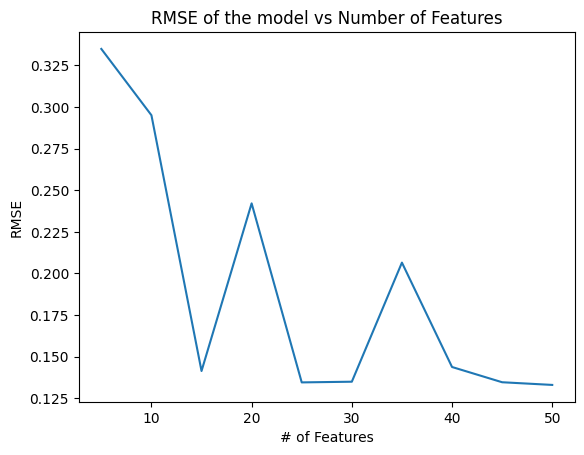

In [78]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt

features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
rmseovr = np.zeros(10)

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
for i in range(len(features)):
    rmsetemp = np.zeros(10)
    for j in range(10):
        import sklearn.model_selection
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
            x, y, test_size=0.2, shuffle=True, random_state=j)
            
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(features[i],features[i]), # two hidden layers
                                                  activation='relu',        # rectified linear
                                                  learning_rate_init=1e-2,  # learning rate
                                                  max_iter=1000,            # number of iterations
                                                  early_stopping=True,      # stop training if validation data gets worse
                                                  random_state=0)           # random number seed for initialization
        
        mlp.fit(x_train, y_train)
        
        output = mlp.predict(x_test)
        
        rmsetemp[j] = np.sqrt(np.mean((y_test-output)**2))
    rmseovr[i] = np.mean(rmsetemp)
    
plt.plot(features, rmseovr)
plt.title("RMSE of the model vs Number of Features")
plt.xlabel('# of Features')
plt.ylabel('RMSE')
plt.show()


Comparing the plots in questions 1d and 1e, the addition of another layer of features decreased the RMSE of the model overall. Starting from 5 features, the addition of another layer reduced the RMSE from ~0.5 in question 1d, to ~0.325. Both of the minima's for question 1d & 1e occoured at 30 features. However, there still showed a decrease in the RMSE at these minima's with the addition of the layer of features. This indicates that the addition of a second layer increases the model's performance in classifying the datapoints.

**f) [1 mark]** Repeat part a) and b) but for this dataset:
```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1
```
(i.e. exactly the same dataset, but with the `x` values scaled by 0.1)

Report the RMSE and generate the output plot from part b).

Is the accuracy better or worse on this scaled dataset, as compared to the original parts a) and b)?  Why?

The RMSE is: 0.44013499623394015


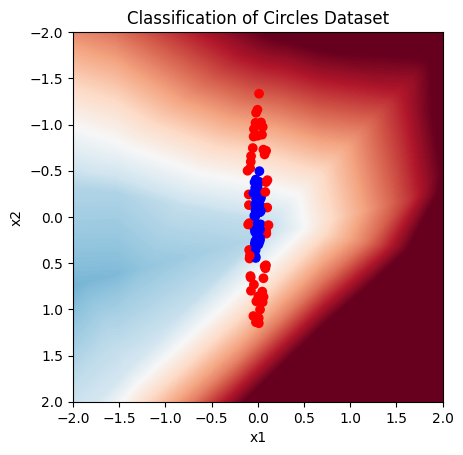

In [8]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import matplotlib.pyplot as plt
import numpy as np

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("The RMSE is:",rmse)

extent = (-2,2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Circles Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))


Comparing the results to the colour plots in questions 1a & 1b, the boundary splitting red and blue points is not as clearly distinctive as the prior plots. The scaling of the data points has also bunched the data closer together, blurring the boundary between data. Also, the RMSE of this question is almost 3 times of the RMSE of questions 1a and 1b. The scaling of the data seems to have shrunk the data points on the x axis of the plot, but the y axis remains unchanged, which likely decreased the accuracy. This type of scaling may have skewed the classification of the data and all the data points need to be scaled on both x[:,0] and x[:,1].

**g) [1 mark]** `sklearn` has a tool for automatically rescaling data for you.  You can create a scaler as follows:

```python
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
```

and then you can transform the `X_train` and `X_test` with `scaler.transform(X_train)` and `scaler.transform(X_test)`.  You can even transform the `pts` used to create the output plot using `scaler.transform(pts)`.

Repeat part f) but use the `scaler` to scale your data before using it.  Report the RMSE and generate the output plot from part b).  How does this accuracy compart to part f) and to the original part a)?

The RMSE is: 0.08643656256131096


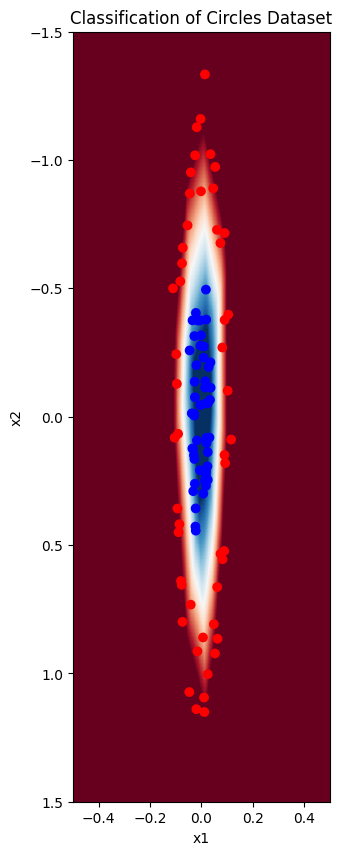

In [9]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import matplotlib.pyplot as plt
import numpy as np

x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)

scaler = sklearn.preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("The RMSE is:",rmse)

extent = (-0.5, 0.5, -1.5, 1.5)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
pts = scaler.transform(pts)
output_pts = mlp.predict(pts)
plt.figure(figsize=(10,10))
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Circles Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))



By using the StandardScaler tool, the boundaries between data categories is clearly distinctive as shown in the enlarged colour plot above. In comparison to question 1f, the difference in the boundary is night and day, as well as the RMSE being 5x less than question 1f's RMSE value. In comparison to question 1a, there shows a decrease in the RMSE by nearly 50%, showing great effect in scaling the data. 

**h) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)
```

Try it both with and without the `scaler` from the part (g), and report the RMSE and generate the output plot both ways.  Should you use the `scaler` for this sort of data?  Why or why not?

RMSE without scaling: 0.07697270460323197


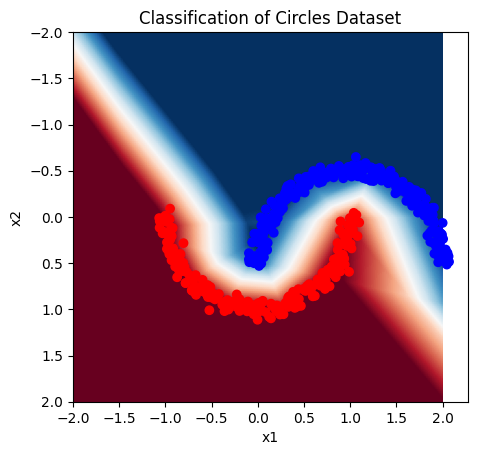

RMSE with scaling: 0.070637164430415


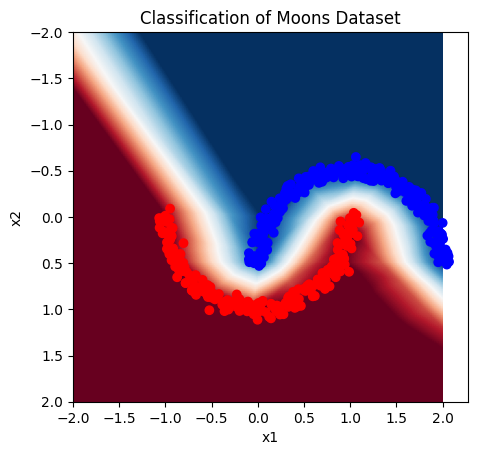

In [11]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import matplotlib.pyplot as plt
import numpy as np

x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)

scaler = sklearn.preprocessing.StandardScaler().fit(x_train)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("RMSE without scaling:",rmse)

extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Circles Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.show()

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("RMSE with scaling:",rmse)

extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
pts = scaler.transform(pts)
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Moons Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))


Using the StandardScaler tool seemed to have little effect on the boundary and RMSE of the model. From the plots shown above, the RMSE differed by only ~0.006, and the boundary did not noticebaly change. Scaling had very little effect and the reasoning behind this would probably be due to the shape of each data grouping. The moon shapes will remain in similar shape, regardless of how they are scaled. Scaling can only strech or squeeze the moon shapes, but nonetheless allowing them to keep the same shape. Due to this reasoning, the boundary created by the model will only differ slightly from scaling the data.

**i) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Try it both with and without the `scaler` from part(g), and report the RMSE and generate the output plot both ways.  Note that you will need to adjust the `extent = (-2, 2, -2, 2)` line so that the output plot covers the same range as the training data (try `(-4,4,-4,4)`).  Should you use the `scaler` for this sort of data?  Why or why not?  Why is the error for this dataset much larger than the error for the other datasets we done so far in this assignment?  Could you improve the accuracy by adjusting the network?  If so, what would you change?

RMSE without scaling: 0.4652708973765152


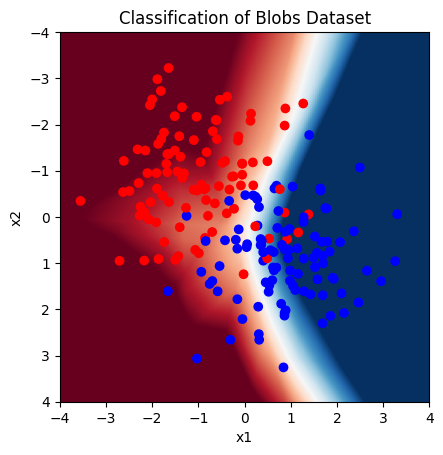

RMSE with scaling: 0.4061900269118517


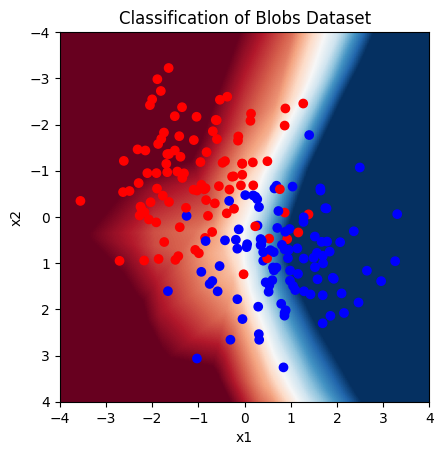

In [12]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import matplotlib.pyplot as plt
import numpy as np
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0)

scaler = sklearn.preprocessing.StandardScaler().fit(x_train)

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("RMSE without scaling:",rmse)

extent = (-4,4, -4, 4)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Blobs Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
plt.show()

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

rmse = np.sqrt(np.mean((y_test-output)**2))

print("RMSE with scaling:",rmse)

extent = (-4, 4, -4, 4)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
pts = scaler.transform(pts)
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification of Blobs Dataset")
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))

There once again seems to show little effect from the StandardScaler tool in this dataset. However, unlike Question 1h, the classification of data is done poorly, before and after the scaling of the data. The reason behind this poor classification is that the dataset overlaps to an extent that a line boundary from the MLP cannot distinctly split the two data groupings from each other. This characteristic is why scaling the has little effect, as the boundary cannot be drawn perfectly from the first place. The mentioned characteristic is also the reason why the RMSE is really high for this model. Something that can be implemented, that was mentioned in class, was the increase of features/inputs into the model can allow for the separation of data groupings by a singular line. As it stands, in only 2 dimensions, it would be impossible for a boundary to be drawn from red and blue points, but it may be possible to draw a definitive decision boundary in the 3rd or 4th dimensions, with the addition of features x3 or x4. Another possible solution to better reduce the RMSE of the model is to alter the amount of nodes per layer or even the amount of hidden layers in the MLP.


### Question 2:


**a) [1 mark]** When using an MLP to do classification, we often don't really care what the exact numerical value of the output is: we just want to classify the input data into a particular category.  The `sklearn.neural_network.MLPClassifier` does this for us, training a separate output for each category (one-hot encoding) and then classifying based on which output is largest.  (Note: it also uses a slightly different Loss function, where the goal is to minimize classification error, rather than minimizing ${1 \over 2}(y_{target}-y)^2$).

You can use the `MLPClassifier` with the same parameters as the `MLPRegressor` we used in question 1.

```
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization
```

Use the MLPClassifier on the `digits` dataset we used in previous assignments.  Split it into 80% training and 20% testing.
```
import sklearn.datasets
digits = sklearn.datasets.load_digits()
```

Train the classifier on the training data (using `mlp.fit`) and test it on the test data (using `mlp.predict`).

Report the accuracy of the classifier, which is computed as the proportion of time that the output is the same as the target output:

```np.mean(output == Y_test)```

Also generate and print the *confusion matrix*, which is a matrix showing how often particular digits are mistaken for other digits:

```
confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print(confusion)
```



In [95]:
import sklearn.neural_network
import numpy as np

import sklearn.datasets
digits = sklearn.datasets.load_digits()

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

acc = np.mean(output == y_test)

print("Accuracy is: ", acc)

confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], y_test[i]] += 1
print(confusion)


Accuracy is:  0.9638888888888889
[[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  0.  0.  0.  0.  1.  0.  1.  2.]
 [ 0.  0. 35.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 29.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 39.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 38.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. 37.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.]]


**b) [1 mark]** Repeat the classification in part a) but for different numbers of features (`[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`).  As with question 1d, repeat the process 10 time for each size, adjusting `random_state` each time.  Generate a plot with the average classification accuracy for these different feature sizes.

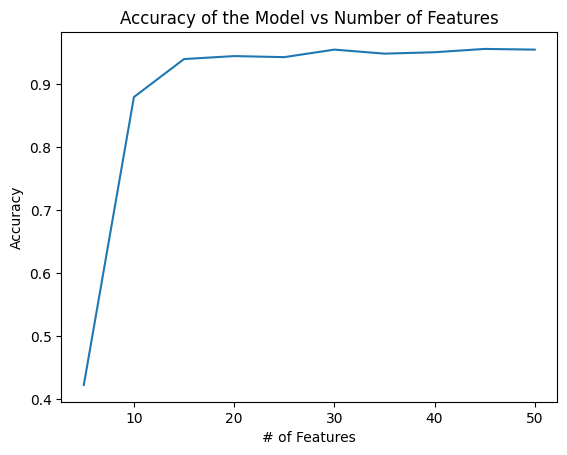

In [99]:
import sklearn
import sklearn.datasets
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt

features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
accovr = np.zeros(10)

import sklearn.datasets
digits = sklearn.datasets.load_digits()

x = digits.data
y = digits.target

for i in range(len(features)):
    acctemp = np.zeros(10)
    for j in range(10):
        import sklearn.model_selection
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
            x, y, test_size=0.2, shuffle=True, random_state=j)
            
        mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(features[i],), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization
        
        mlp.fit(x_train, y_train)
        
        output = mlp.predict(x_test)
        
        acctemp[j] = np.mean(output == y_test)
    accovr[i] = np.mean(acctemp)
    
plt.plot(features, accovr)
plt.title("Accuracy of the Model vs Number of Features")
plt.xlabel('# of Features')
plt.ylabel('Accuracy')
plt.show()


**c) [1 mark]** What happens if you set `hidden_layer_sizes=()`?  This should not generate any new features at all.  How accurate is the system now?  Since there are no new features to learn, what is the MLP doing in this case? (Hint: this is now the same thing as an algorithm we have worked with earlier in the course)

In [100]:
import sklearn
import sklearn.neural_network
import numpy as np

import sklearn.datasets
digits = sklearn.datasets.load_digits()

import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0)
    
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(),  
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization

mlp.fit(x_train, y_train)

output = mlp.predict(x_test)

acc = np.mean(output == y_test)

print(acc)

confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], y_test[i]] += 1
print(confusion)


0.9638888888888889
[[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 33.  0.  0.  0.  0.  1.  0.  2.  0.]
 [ 0.  0. 33.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  2. 28.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 30.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 38.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  2.  1.  0.  0.  0.  0.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0. 41.]]


The accuracy of the model remains unchanged from Question 2a, as it still is 96.38%. When not specifying the amount of hidden layers in the MLP, the MLP defaults to having no layers, mimicking Logistic Regression. The idea of this was shown in Slide 8 of Lecture 7 content, as the Learning Rule becomes a linear relation between the weights and the inputs/outputs.

**d) [2 marks]** Using the following dataset, do the best job you can at building a classifier and testing it.

```python
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)
```

You can use any of the supervised learning models from the assignments so far: the perceptron (`sklearn.linear_model.Perceptron`), regression (`sklearn.linear_model.Ridge`), linear SVM (`sklearn.svm.LinearSVC`), kernel-based SVM ('sklearn.svm.SVC'), and the MLPClassifier (`sklearn.neural_network.MLPClassifier`). Make sure to develop your models only using the training data (perhaps split into training and validation), and only once you have chosen your best model should you test it on the testing data.  You are trying to get the best accuracy (`np.mean(output == Y_test)`) possible.

In [72]:
import sklearn.datasets
import sklearn.linear_model


digits = sklearn.datasets.load_digits()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)

lrates = np.logspace(-2, 2, 5)
costs = np.logspace(-3, 3, 7)
gammas = np.logspace(-3, 3, 7)

def ppred(a,b,c,d):
    perceptron = sklearn.linear_model.Perceptron(eta0=d)
    perceptron.fit(a, b)
    output = perceptron.predict(c)
    return output

def rpred(a,b,c,d):
    ridge = sklearn.linear_model.Ridge(alpha=d)
    ridge.fit(a, b)
    output = ridge.predict(c)
    return output

def lspred(a,b,c,d):
    svm = sklearn.svm.LinearSVC(C=d,dual=False, max_iter=5000)
    svm.fit(a, b)
    output = svm.predict(c)
    return output

def kspred(a,b,c,d,e):
    svm = sklearn.svm.SVC(kernel='rbf', gamma=d, C=e)
    svm.fit(a, b)
    output = svm.predict(c)
    return output

def mpred(a,b,c,d):
    mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(30,), # one hidden layer with 30 features, found to be best performing in Question 2b 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=d)           # random number seed for initialization
    mlp.fit(a, b)
    output = mlp.predict(c)
    return output

acc = np.zeros(5)
for l in range(len(lrates)):
    tempacc = np.zeros(5)
    for i in range(5):
        x_Train, x_val, y_Train, y_val = sklearn.model_selection.train_test_split(
            x_train, y_train, test_size=0.5, shuffle=True, random_state=0,
        )
        tempacc[i] = np.mean(ppred(x_Train,y_Train,x_val,lrates[l]) == y_val)
    acc[l] = np.mean(tempacc)
print("The maximum accuracy of the perceptron on the validation dataset was:",acc[np.argmax(acc)])
print("The optimal learning rate was:", lrates[np.argmax(acc)])

acc = np.zeros(5)
for l in range(len(lrates)):
    tempacc = np.zeros(5)
    for i in range(5):
        x_Train, x_val, y_Train, y_val = sklearn.model_selection.train_test_split(
            x_train, y_train, test_size=0.5, shuffle=True, random_state=0,
        )
        tempacc[i] = np.mean(rpred(x_Train,y_Train,x_val,lrates[l]) == y_val)
    acc[l] = np.mean(tempacc)
print("The maximum accuracy of Ridge Regression on the validation dataset was:",acc[np.argmax(acc)])

acc = np.zeros(len(costs))
for l in range(len(costs)):
    tempacc = np.zeros(5)
    for i in range(5):
        x_Train, x_val, y_Train, y_val = sklearn.model_selection.train_test_split(
            x_train, y_train, test_size=0.5, shuffle=True, random_state=0,
        )
        tempacc[i] = np.mean(lspred(x_Train,y_Train,x_val,costs[l]) == y_val)
    acc[l] = np.mean(tempacc)
print("The maximum accuracy of the Linear SVM on the validation dataset was:",acc[np.argmax(acc)])
print("The optimal cost value was:", costs[np.argmax(acc)])

acc = np.zeros((len(costs),len(gammas)))
tempacc = np.zeros(5)
for i in range(len(costs)):
    for j in range(len(gammas)):
        for h in range(5):
            x_Train, x_val, y_Train, y_val = sklearn.model_selection.train_test_split(
                x_train, y_train, test_size=0.5, shuffle=True, random_state=0,
            )
            output = kspred(x_Train,y_Train,x_val,gammas[j],costs[i])
            tempacc[h] = np.mean(output==y_val)
        acc[i][j] = np.mean(tempacc)

from numpy import unravel_index
ocost = costs[unravel_index(acc.argmax(), acc.shape)[0]]
ogamma = gammas[unravel_index(acc.argmax(), acc.shape)[1]]
print("The maximum accuracy of the kernel based SVM on the validation dataset was:",acc[unravel_index(acc.argmax(), acc.shape)])
print("The optimal cost and gamma values respectively:", ocost,"&", ogamma)

tempacc = np.zeros(5)
for i in range(5):
    x_Train, x_val, y_Train, y_val = sklearn.model_selection.train_test_split(
        x_train, y_train, test_size=0.5, shuffle=True, random_state=0,
    )
    tempacc[i] = np.mean(mpred(x_Train,y_Train,x_val,i) == y_val)
acc = np.mean(tempacc)
print("The maximum accuracy of MLP on the validation dataset was:",acc)

output = kspred(x_train,y_train,x_test,ogamma,ocost)
finacc = np.mean(output==y_test)
print("The optimal accuracy using the optimal cost and gamma values on the kernel based SVM was:", finacc)


The maximum accuracy of the perceptron on the validation dataset was: 0.9095966620305982
The optimal learning rate was: 0.01
The maximum accuracy of Ridge Regression on the validation dataset was: 0.0
The maximum accuracy of the Linear SVM on the validation dataset was: 0.9457579972183587
The optimal cost value was: 0.001
The maximum accuracy of the kernel based SVM on the validation dataset was: 0.9777468706536856
The optimal cost and gamma values respectively: 10.0 & 0.001
The maximum accuracy of MLP on the validation dataset was: 0.9151599443671767
The optimal accuracy using the optimal cost and gamma values on the kernel based SVM was: 0.9916666666666667


### Question 3:

**[1 mark]** Describe what you would like to do for your final project.  In particular, tell me what dataset you want to analyse (either one you've made up, or one found online in places like https://www.kaggle.com/datasets or one from the various papers we've discussed in class).  Given that dataset, describe what algorithms you want to try on that dataset.  You should include both very simple algorithms and more complex ones.  Indicate what parameters of those algorithms you would adjust and what you would measure as you are adjusting those parameters.

Even though the final project can be done in groups of 2, each member of the group should write their answer this question separately.

I plan to partner with Gurman Brar for the final project in this course. The scope of our project is to accurately classify specific knee exercise data into proper completion and improper completion categories. Data inputs for the project would use IMU data that are attached onto a knee wearable, providing acceleration data, roll, pitch and yaw data, as well as angular velocities and acceleration in the same domains. It would be highly unlikely to find this specific of a dataset via online resources, so we plan to collect our own data entries and label them accordingly. 

With our own labelled data, we plan to use a few supervised learning algorithms, namely SVMs, perhaps regression and k means classification. We also plan to design a neural network (either a CNN or RNN) to compare our results with the other models. We plan on hyper tuning our parameters for the best accuracy on our test dataset, with the parameters for all the mentioned models being: learning rate, cost, gamma, max_iterations, # of layers, # of nodes per layer.